In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns                  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pd.pandas.set_option("display.max_columns",None)

# Data Analysis

In [163]:
heart_data=pd.read_csv("heart.csv")
heart_data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


### Missing Values

In [164]:
features_missing_value=[feature for feature in heart_data.columns if heart_data[feature].isnull().sum()>1]
if len(features_missing_value)==0:
    print("Dataset have no missing values")
else:
    for feature in features_missing_value:
        print("{}:{}".format(feature,np.round(heat_data[feature].isnull().mean(),4)))
        

Dataset have no missing values


### Check  Numerical & Categorical features

In [165]:
#numerical values
numerical_features=[feature for feature in heart_data.columns if heart_data[feature].dtype!="O"]
print("Numerical Fearures")
print(numerical_features)
#Categorical values
categorical_features=[feature for feature in heart_data.columns if heart_data[feature].dtype=="O"]
print("Categorical Features")
print(categorical_features)

Numerical Fearures
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Categorical Features
[]


In [166]:
#mean of numerical & Categorical feature
total_features=len(heart_data.columns)
numerical_feature_mean=len(numerical_features)/total_features
categorical_feature_mean=len(categorical_features)/total_features
print("{} Numerical Features".format(numerical_feature_mean))
print("{} Categorical Features".format(categorical_feature_mean))

1.0 Numerical Features
0.0 Categorical Features


That's Good all the features are numerical so no nead to handle the Categorical features more|

   ### Checking Outliers In Data 

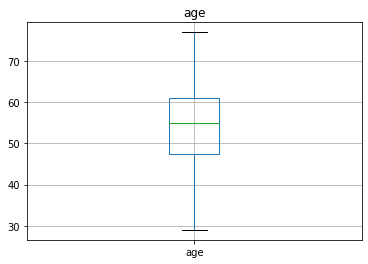

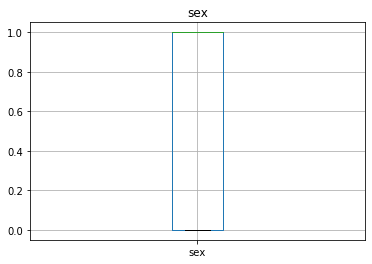

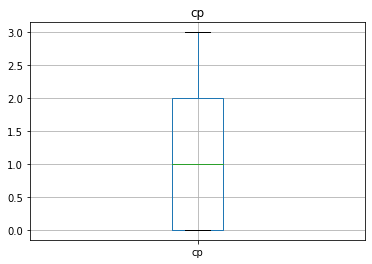

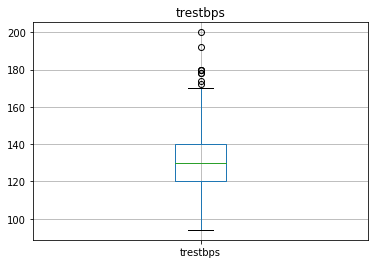

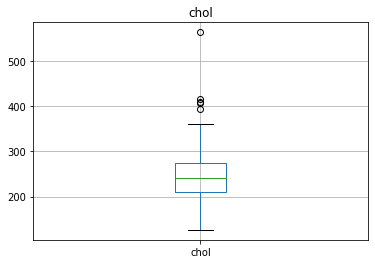

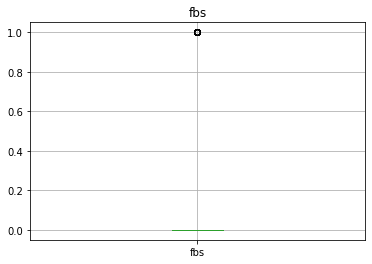

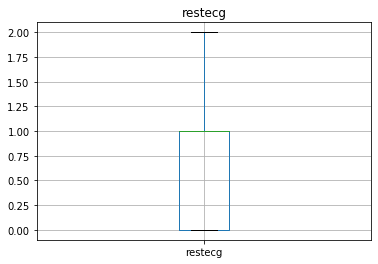

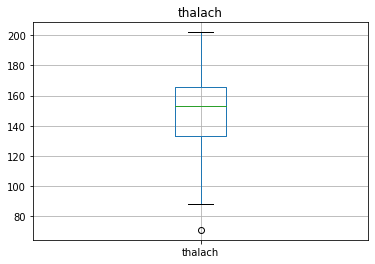

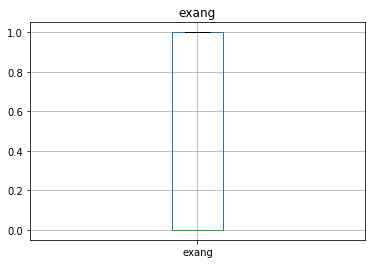

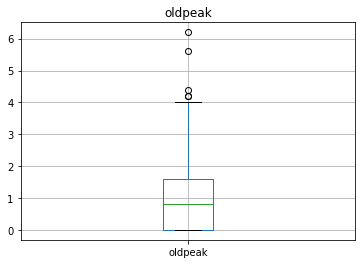

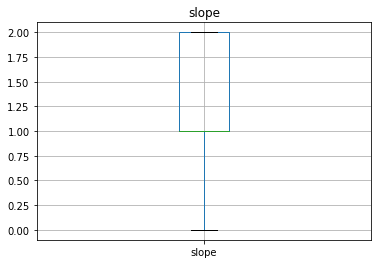

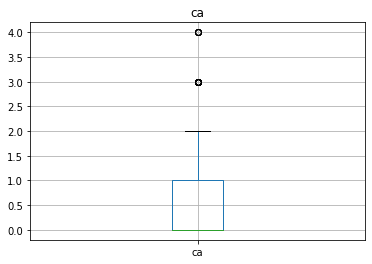

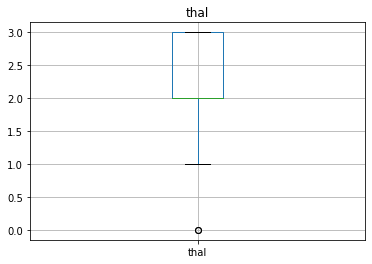

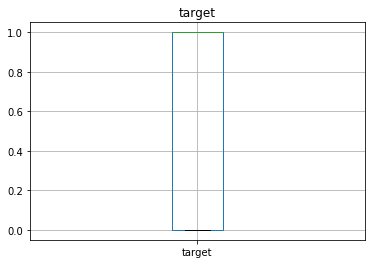

In [167]:
for feature in heart_data.columns:
    heart_data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

less amount of outliers are present in  given dataset

###  Relationship between independent and dependent feature(targert)




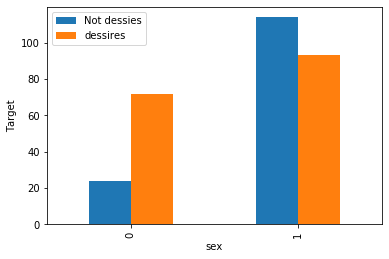

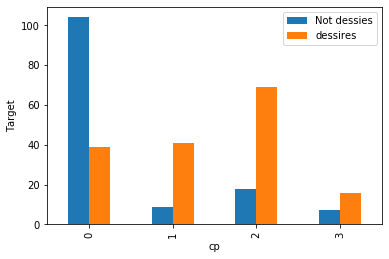

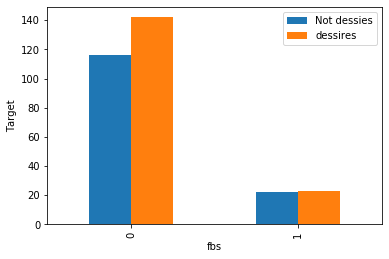

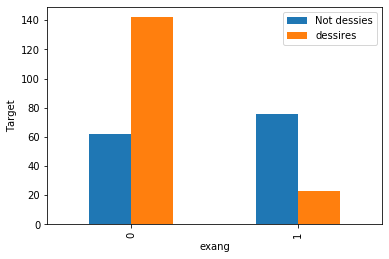

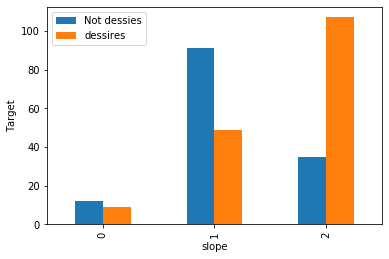

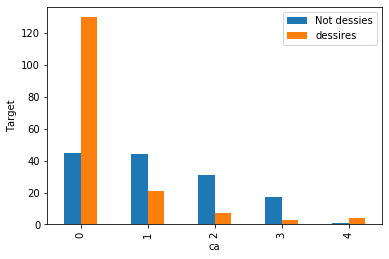

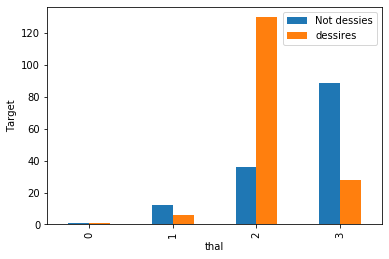

In [168]:
binary_feature=["sex","cp","fbs","exang","slope","ca","thal"]
for feature in binary_feature:
    pd.crosstab(heart_data[feature],heart_data["target"]).plot(kind="bar")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.legend(["Not dessies","dessires"])
    plt.show()
    

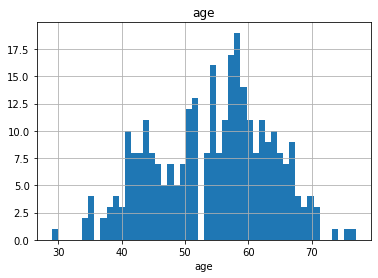

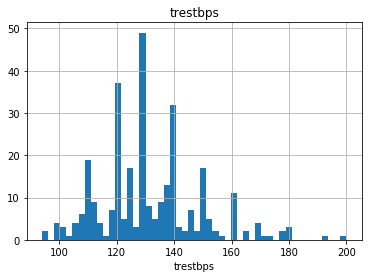

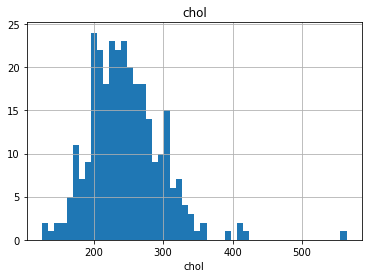

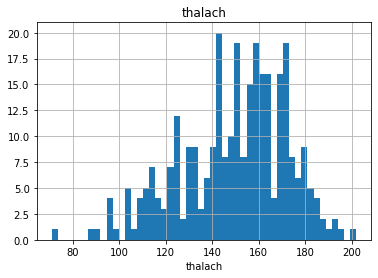

In [169]:
## Lets analyse the continuous values by creating histograms to understand the distribution
continuous_features=["age","trestbps","chol","thalach"]
for feature in  continuous_features:
    heart_data[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()
    


# Feature Engineering

In [170]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [171]:
d_cp=pd.get_dummies(heart_data["cp"],prefix="cp",drop_first=True)
d_slope=pd.get_dummies(heart_data["slope"],prefix="d_slope",drop_first=True)
d_thal=pd.get_dummies(heart_data["thal"],prefix="d_slope",drop_first=True)
heart_data=pd.concat([heart_data,d_cp,d_slope,d_thal],axis=1)
heart_data.drop(["cp","slope","thal"],axis=1,inplace=True)

In [172]:
#scaling the continuous features 
scaler=MinMaxScaler()
continuous_features=["age","trestbps","chol","thalach"]
scaler.fit(heart_data[continuous_features])
scaler.transform(heart_data[continuous_features])
heart_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,d_slope_1,d_slope_2,d_slope_1,d_slope_2,d_slope_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,0,0,0,1,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,1,1,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,2,0,0,0,0,1,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,1,0,0,0,0,1,0,0,0,1


# Feature Selection

In [173]:
#spliting the data into the traing and testing data set
x=heart_data.drop("target",axis=1)
y=heart_data["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [174]:

feature_selected=SelectFromModel(DecisionTreeClassifier(random_state=2))

In [175]:
feature_selected.fit(x_train,y_train)
feature_selected_list=x_train.columns[feature_selected.get_support()]
print("feature selected= {}".format(feature_selected_list.shape))
heart_data.shape

feature selected= (7,)


(303, 19)

In [176]:
#x_selected=heart_data[feature_selected_list]
#x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=0)

In [187]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_predict=tree.predict(x_test)

In [188]:
print("Confussion metrics")
print(confusion_matrix(y_test,y_predict))
print("Classification Report")
print(classification_report(y_test,y_predict))

Confussion metrics
[[20 12]
 [ 3 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.62      0.73        32
           1       0.68      0.90      0.78        29

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61



In [228]:
tree.score(x_test,y_test)

0.7540983606557377